# Requirements

In [35]:
import pickle

import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np
import requests
import re
import json
import random
import scipy

import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

from nltk import ngrams

import seaborn as sns
import geoplot as gplt

import warnings
warnings.filterwarnings('ignore')

import sddk
import tempun

In [89]:
import matplotlib
matplotlib.__version__

'3.5.0'

In [95]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

figpath = "SDAM_data/social_diversity/socdiv_figures/"

def save_figure(fig, fig_name):
    #each figure to be saved in four different versions
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".svg")
    fig.savefig("../figures/" + fig_name + ".png")
    s.write_file(figpath + fig_name + ".eps", fig)
    s.write_file(figpath + fig_name + ".png", fig)

In [93]:
s = sddk.cloudSession("sciencedata.dk", "SDAM_root", "648597@au.dk")

connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


# Import the dataset

In [5]:
LIRE = gpd.read_parquet("../data/large_data/LIRE_occupsorgs_cats.parquet")
LIRE.head(5)

,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,status_notation,inscr_process,notes_references,notes_comments,inscription,inscription_stripped_final,Links,dating from,dating to,status,Latitude,Longitude,photo,Material,Comment,EDH-ID,language_EDCS,clean_text_interpretive_word_EDCS,responsible_individual,type_of_inscription,letter_size,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,edh_geography_uri,commentary,trismegistos_uri,external_image_uris,fotos,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,clean_text_conservative,clean_text_interpretive_sentence,findspot,year_of_find,present_location,religion,geography,social_economic_legal_history,military,not_after,language,not_before,coordinates,clean_text_interpretive_word,urban_context,within_rome,nearest_city,city_id_hanson,city_pop_est,city_geometry,nearest_city_type,nearest_city_dist,type_of_inscription_auto,type_of_inscription_auto_prob,geometry,is_western,large_city_ID,large_city_geo,large_city_dist,medium_city_ID,medium_city_geo,medium_city_dist,small_city_ID,small_city_geo,small_city_dist,urban_context_alt,occups,occups_N,organizations,organizations_N,occups_cats
0,EDCS-03700724,"ZPE-108-159 = Thesprotia 00001 = AE 1993, 0140...",Achaia,Achaia,Agios Athanasios / Photike,"['Agios Athanasios', 'Photike']",313,,"['Augusti/Augustae', 'litterae erasae', 'ordo ...",tituli honorarii,"['Augusti/Augustae', 'ordo equester', 'tria no...",litterae erasae,,,Fortissimo et Piis/simo Caesari d(omino) n(ost...,Fortissimo et Piis/simo Caesari d(omino) n(ost...,http://db.edcs.eu/epigr/partner.php?s_language...,309.0,313,Augusti/Augustae; litterae erasae; ordo equest...,39.451218,20.766767,http://db.edcs.eu/epigr/bilder.php?bilder.php?...,None,None,HD052964,None,Fortissimo et Piissimo Caesari domino nostro G...,Cowey,honorific inscription,3-5.3 cm,"AE 1993, 1406.; V. Papadopoulou, AD 43 B, 1988...",checked with photo,99 cm,FORTISSIMO ET PIIS / SIMO CAESARI D N / GAL VA...,"[{'name': 'Gal. Val. [[Maximiano]]', 'nomen': ...",67 cm,None,statue base,Epirus,67 cm,Fortissimo et piis/simo Caesari d(omino) n(ost...,Greece,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Photike,2014-09-16,Ípeiros,Paramythía,https://edh-www.adw.uni-heidelberg.de/edh/geog...,None,https://www.trismegistos.org/text/121715,{ },{ },121715,"['http://www.trismegistos.org/place/000655', '...",Fortissimo et piissimo Caesari...,309 AD – 313 AD,21,unbestimmt,57.0,Statuenbasis,138,unbestimmt,1000.0,69,Ehreninschrift,honorific inscription,Certain,99.0,67.0,67.0,NULL,statue base,Certain,Epirus,Certain,Greece,Certain,Photike,Certain,Ípeiros,Certain,Paramythía,Certain,Agios Athanasios,Certain,309 AD – 313 AD,Fortissimo et piissimo Caesari d n Gal Val P F...,Fortissimo et piissimo Caesari domino nostro G...,Agios Athanasios,None,Fragma Kalama,None,data available,None,None,313.0,Latin,309.0,"[20.7668, 39.4512]",Fortissimo et piissimo Caesari domino nostro G...,rest,False,Dodona,31,1000.0,"[20.787767, 39.546432]",minor,0.097513,honorific inscription,1.0,POINT (20.76680 39.45120),False,65,"[20.733395, 39.026505]",47237.78,7,"[20.987, 39.158]",37687.28,31,"[20.787767, 39.546432]",10725.84,rural,[],0,[],0,[]
1,EDCS-03300852,"AE 1995, 01409",Achaia,Ach

# Exploring durations

In [7]:
def get_duration(start, stop):
  try:
    duration = abs(int(start) - int(stop)) + 1
    if 0 in range(int(start),  int(stop)):
      duration = duration - 1
  except:
    duration = np.nan
  return duration

LIRE["duration"] = LIRE.apply(lambda row: get_duration(row["not_before"], row["not_after"]), axis=1)

In [87]:
from importlib import reload

(-5.0, 305.0)

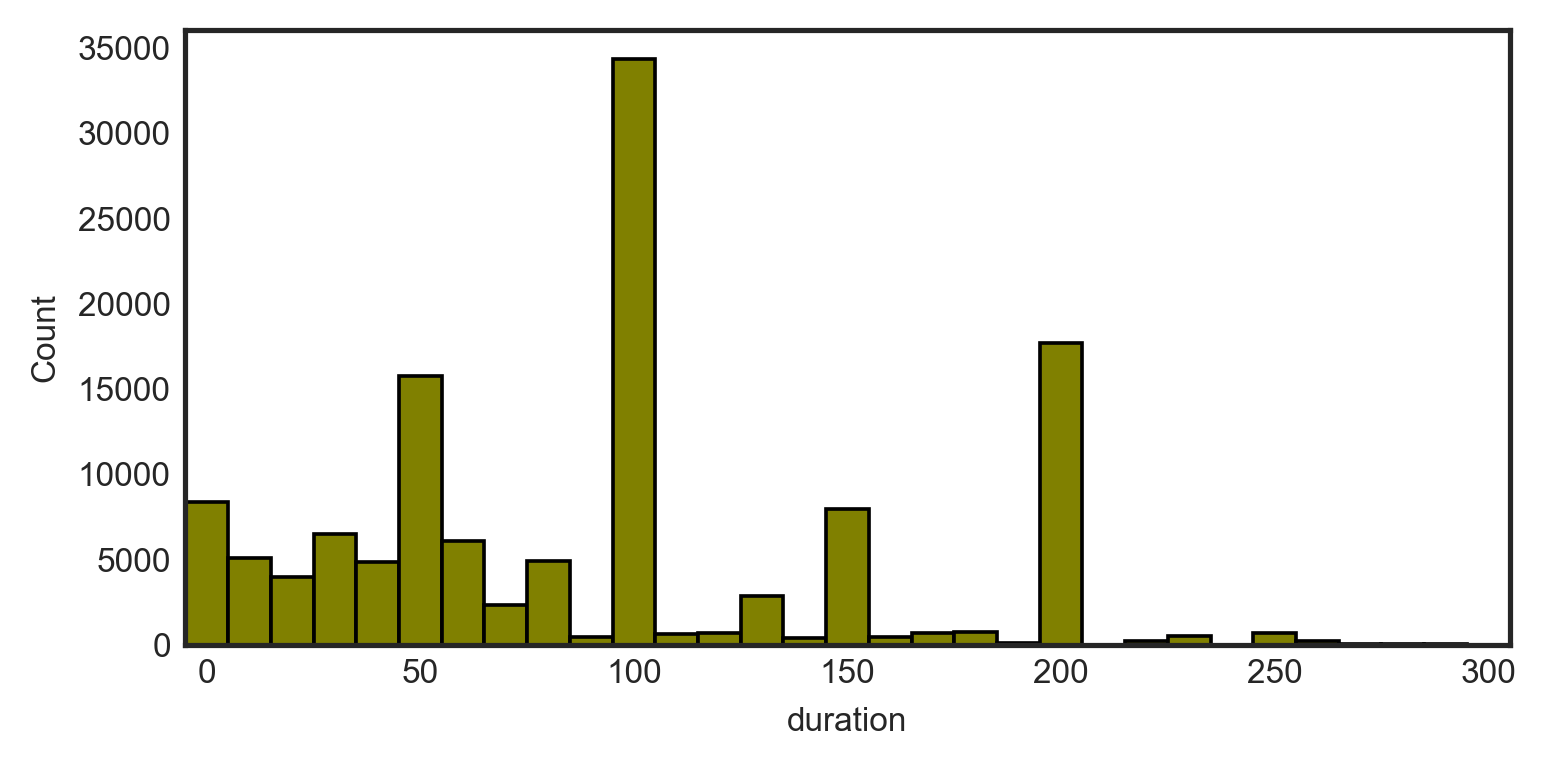

In [85]:
fig, ax = plt.subplots(figsize=(5.2, 2.6), tight_layout=True)
sns.histplot(LIRE["duration"], kde=False, bins=range(-5, 305,10), alpha=1, color="olive", ax=ax)
ax.set_xlim(-5, 305)

In [86]:
fig.savefig("test_durations.eps", format="eps")

In [15]:
save_figure(fig, "durations_histogram")

A file with the same name ("durations_histogram.eps") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/durations_histogram.eps"
A file with the same name ("durations_histogram.png") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/durations_histogram.png"


In [14]:
fig.savefig("../figures/durations_histogram.eps", format="eps", dpi=300)

In [17]:
durations_df = pd.DataFrame(LIRE.groupby("duration").size().sort_values(ascending=False))
durations_df.reset_index(inplace=True)
durations_df = durations_df.astype(int)
durations_df.columns = ["duration", "count"]
durations_df["pct"] = np.round((durations_df["count"] / len(LIRE)) * 100, 2)
durations_df.head(20)

,duration,count,pct
0,100,33920,24.91
1,200,17658,12.97
2,50,15102,11.09
3,150,7542,5.54
4,300,5343,3.92
5,60,5176,3.80
6,1,4332,3.18
7,30,3471,2.55
8,40,2675,1.96
9,130,2652,1.95


In [18]:
durations_df.to_csv("../data/durations_table.csv")

# Random dates and overall simulations

In [19]:
%%time
# generate a list of 1000 random dates for each inscription in the dataset
# takes approx. 90 seconds in Google colab
LIRE["random_dates"] = LIRE.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=1000), axis=1)

CPU times: user 40.5 s, sys: 3.96 s, total: 44.4 s
Wall time: 47.9 s


In [20]:
%%time
LIRE_complete_simulations = tempun.timeblocks_from_randoms(LIRE, "random_dates", [-50, 350, 50])

CPU times: user 6.45 s, sys: 9.52 s, total: 16 s
Wall time: 23.4 s


In [22]:
# periods definitions

periods = { # to avoid overlaps, startdates are postponed by one year, when needed
    "Julio-Claudian" : {"startdate": -27, "enddate" : 68},
    "Flavian" : {"startdate": 69, "enddate": 96},
    "Nerva-Antonine" : {"startdate" : 97, "enddate" : 192},
    "Severan" : {"startdate": 193, "enddate": 235},
    "Barracks emperors" : {"startdate" : 236, "enddate" : 284},
    "Tetrarchy\n& Constantine I" : {"startdate" : 285, "enddate" : 337}
    }
timeblocks_periods = [(periods[period]["startdate"], periods[period]["enddate"]) for period in periods]
timeblocks_periods

[(-27, 68), (69, 96), (97, 192), (193, 235), (236, 284), (285, 337)]

In [23]:
colors_list = [color for color in list(mcolors.CSS4_COLORS.keys()) if "light" in color][2:]
colors_list

['lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 'lightgreen',
 'lightgrey',
 'lightpink',
 'lightsalmon',
 'lightseagreen',
 'lightskyblue',
 'lightslategray',
 'lightslategrey',
 'lightsteelblue',
 'lightyellow']

In [24]:
periods_duration = [abs(tup[1] - tup[0]) for tup in timeblocks_periods]
periods_duration

[95, 27, 95, 42, 48, 52]

In [25]:
%%time
var_data_lire = []
for var_n in range(1000):
    var_data_lire.append([var[var_n] for var in LIRE["random_dates"] if var !=None])

CPU times: user 46.3 s, sys: 2min 1s, total: 2min 47s
Wall time: 5min 46s


In [33]:
%%time
var_data_large, var_data_medium, var_data_small, var_data_rural = [], [], [], []
for var_n in range(1000):
    var_data_large.append([var[var_n] for var in LIRE[LIRE["urban_context_alt"]=="large"]["random_dates"] if var !=None])
    var_data_medium.append([var[var_n] for var in LIRE[LIRE["urban_context_alt"]=="medium"]["random_dates"]  if var !=None])
    var_data_small.append([var[var_n] for var in LIRE[LIRE["urban_context_alt"]=="small"]["random_dates"]  if var !=None])
    var_data_rural.append([var[var_n] for var in LIRE[LIRE["urban_context_alt"]=="rural"]["random_dates"]  if var !=None])

CPU times: user 3min 58s, sys: 3min 8s, total: 7min 7s
Wall time: 9min 13s


CPU times: user 26min 46s, sys: 37min 5s, total: 1h 3min 52s
Wall time: 12min 11s


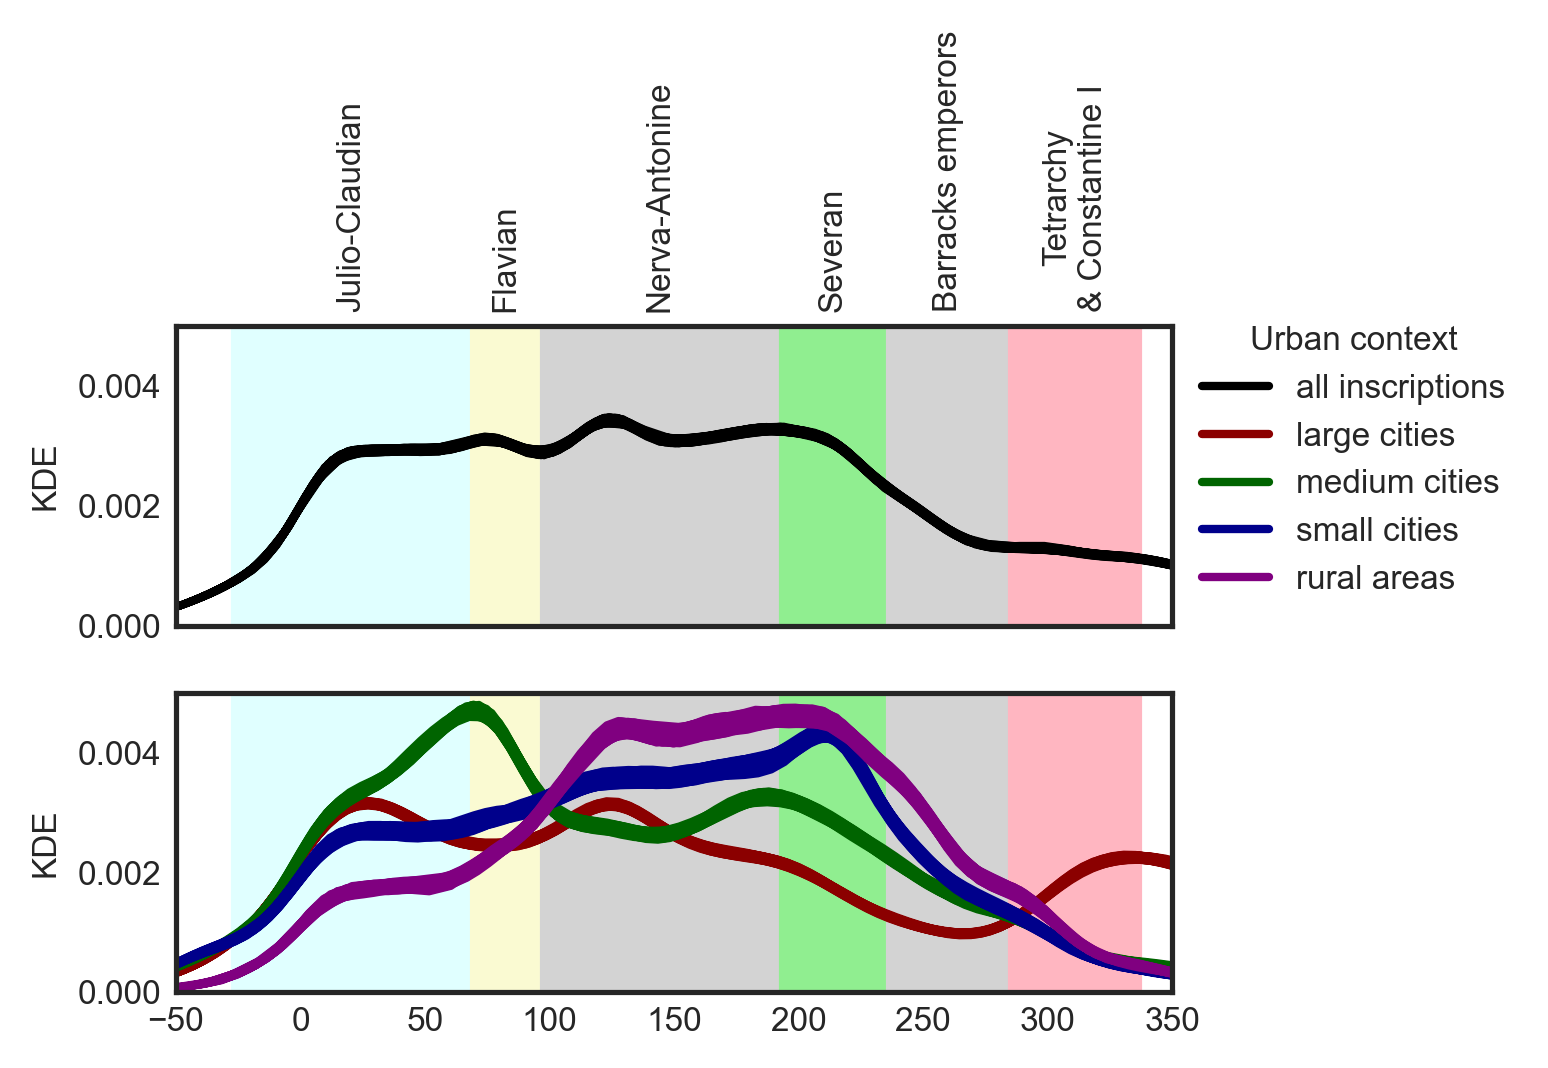

In [97]:

%%time
n_sim = 1000
labels=[key for key in periods.keys()]
positions = [np.mean(tup) for tup in timeblocks_periods]

fig, [ax1, ax3] = plt.subplots(2,1, figsize=[5.2, 3.6], tight_layout=True)


# ax1 - total KDE plot
for data in var_data_lire[:n_sim]:
    sns.kdeplot(data, ax=ax1, color="black")

for period, color in zip(periods.keys(), colors_list):
    ax1.axvspan(periods[period]["startdate"], periods[period]["enddate"], color=color)#, linestyles="dashed", color="red")
ax1.set_xlim(-50,350)
# period labels
ax1.set_xticks(positions)
ax1.set_xticklabels(labels)
ax1.xaxis.set_tick_params(rotation=90)
ax1.xaxis.tick_top()
ax1.set_ylabel("KDE")
ax1.set_ylim(0,0.005)

ax1.set_rasterized(True)

# ax3 - KDE plot
for period, color in zip(periods.keys(), colors_list):
    ax3.axvspan(periods[period]["startdate"], periods[period]["enddate"], color=color)#, linestyles="dashed", color="red")

for data in var_data_large[:n_sim]:
    sns.kdeplot(data, ax=ax3, color="darkred")
for data in var_data_medium[:n_sim]:
    sns.kdeplot(data, ax=ax3, color="darkgreen")
for data in var_data_small[:n_sim]:
    sns.kdeplot(data, ax=ax3, color="darkblue")
for data in var_data_rural[:n_sim]:
    sns.kdeplot(data, ax=ax3, color="purple")

ax3.set_xlim(-50,350)
ax3.set_ylabel("KDE")
#ax3.set_xticks([])
ax3.set_ylim(0,0.005)
#ax3.set_title("C", x=0.02, y=0.65)
ax3.set_rasterized(True)

legend_labels=[
    "all inscriptions",
    "large cities",
    "medium cities",
    "small cities",
    "rural areas"]

colors=["black", "darkred", "darkgreen", "darkblue", "purple"]
markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors]
ax1.legend(markers, legend_labels, numpoints=1,  title="Urban context", bbox_to_anchor=(1, 0), loc='lower left')

In [98]:
save_figure(fig, "lire_tempdist_by_context_kde")

A file with the same name ("lire_tempdist_by_context_kde.eps") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_tempdist_by_context_kde.eps"
A file with the same name ("lire_tempdist_by_context_kde.png") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_tempdist_by_context_kde.png"


In [99]:
%%time
sim_large  = tempun.timeblocks_from_randoms(LIRE[LIRE["urban_context_alt"]=="large"], "random_dates", [-50, 350, 50])
sim_medium = tempun.timeblocks_from_randoms(LIRE[LIRE["urban_context_alt"]=="medium"], "random_dates", [-50, 350, 50])
sim_small =  tempun.timeblocks_from_randoms(LIRE[LIRE["urban_context_alt"]=="small"], "random_dates", [-50, 350, 50])
sim_rural = tempun.timeblocks_from_randoms(LIRE[LIRE["urban_context_alt"]=="rural"], "random_dates", [-50, 350, 50])

CPU times: user 3.81 s, sys: 828 ms, total: 4.64 s
Wall time: 5.43 s


CPU times: user 42.4 ms, sys: 16.2 ms, total: 58.6 ms
Wall time: 47.5 ms


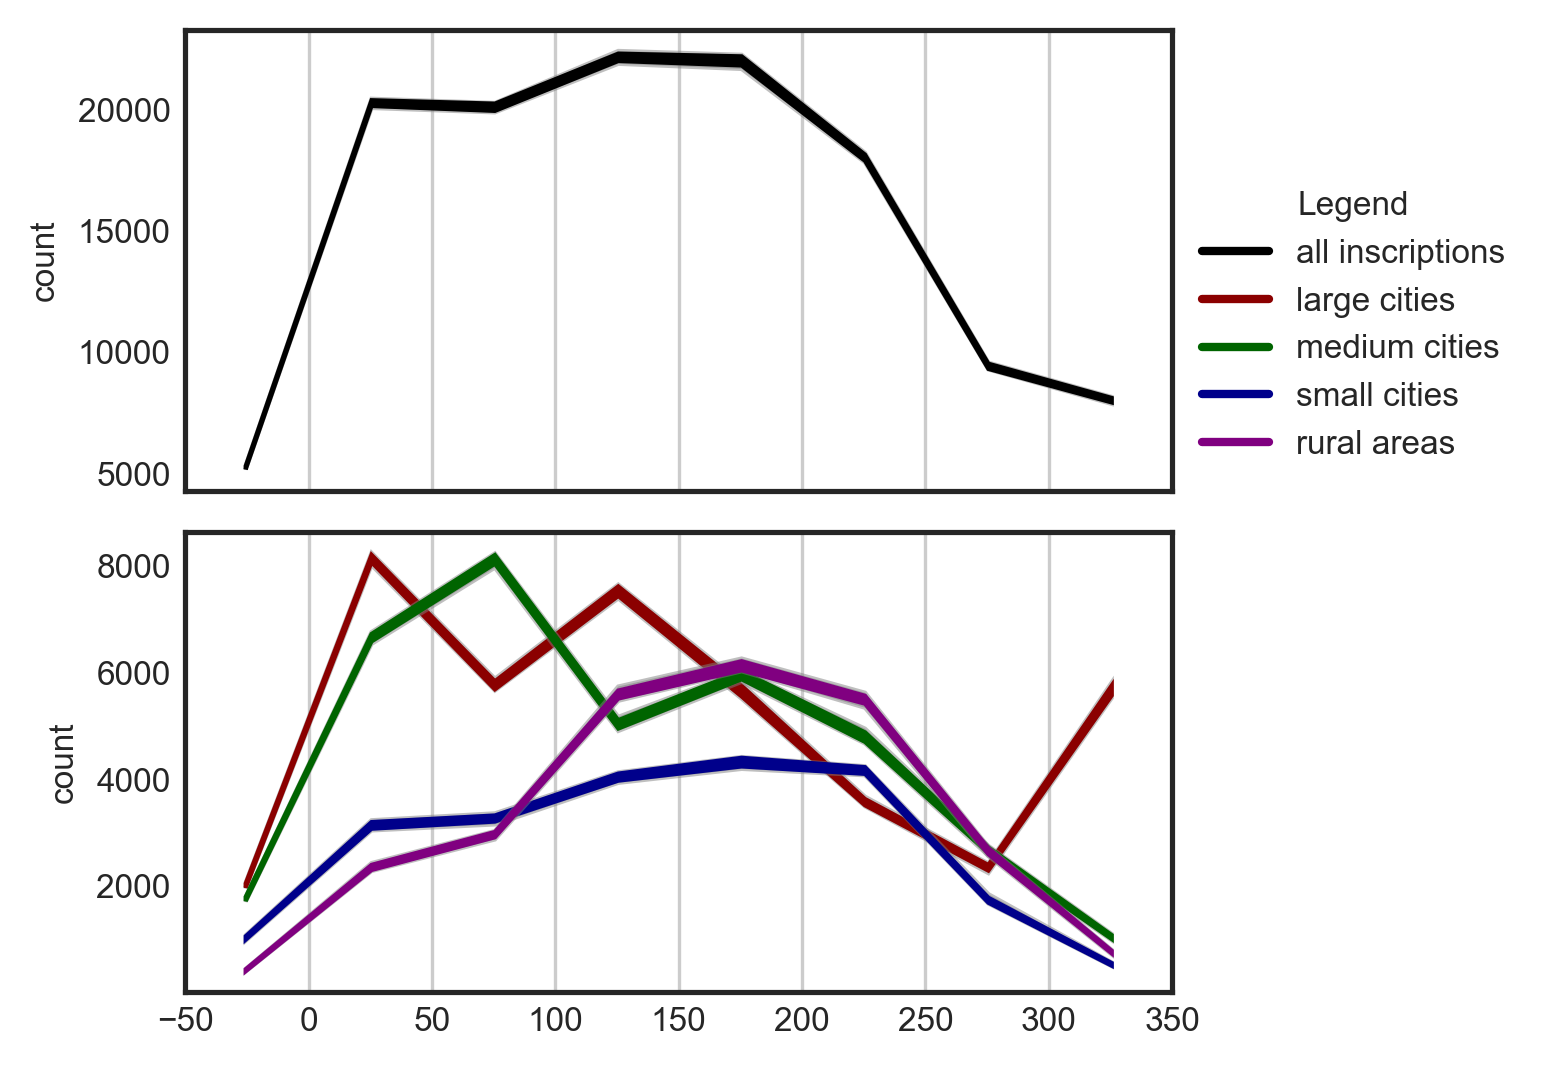

In [100]:
%%time 
labels=[key for key in periods.keys()]
positions = [np.mean(tup) for tup in timeblocks_periods]

fig, [ax2, ax4] = plt.subplots(2,1, figsize=[5.2, 3.6], tight_layout=True)

# ax2 - timeblocks
tempun.plot_timeblocks_data(LIRE_complete_simulations, color="black", ax=ax2)
ax2.set_ylabel("count")
ax2.set_xlim(-50,350)
ax2.xaxis.grid()
ax2.set_xticklabels([])

# ax4 - timeblocks
tempun.plot_timeblocks_data(sim_large, color="darkred", ax=ax4)
tempun.plot_timeblocks_data(sim_medium, color="darkgreen", ax=ax4)
tempun.plot_timeblocks_data(sim_small, color="darkblue", ax=ax4)
tempun.plot_timeblocks_data(sim_rural, color="purple", ax=ax4)
ax4.set_ylabel("count")
ax4.set_xlim(-50,350)
ax4.xaxis.grid()
#ax4.set_title("D", x=0.02, y=0.65)
legend_labels=[
    "all inscriptions",
    "large cities",
    "medium cities",
    "small cities",
    "rural areas"]

colors=["black", "darkred", "darkgreen", "darkblue", "purple"]
markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors]
ax2.legend(markers, legend_labels, numpoints=1,  title="Legend", bbox_to_anchor=(1, 0), loc='lower left')

In [101]:
save_figure(fig, "lire_tempdist_by_context_timeblocks")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_tempdist_by_context_timeblocks.eps"
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_tempdist_by_context_timeblocks.png"


CPU times: user 26min 21s, sys: 39min 38s, total: 1h 6min
Wall time: 9min 37s


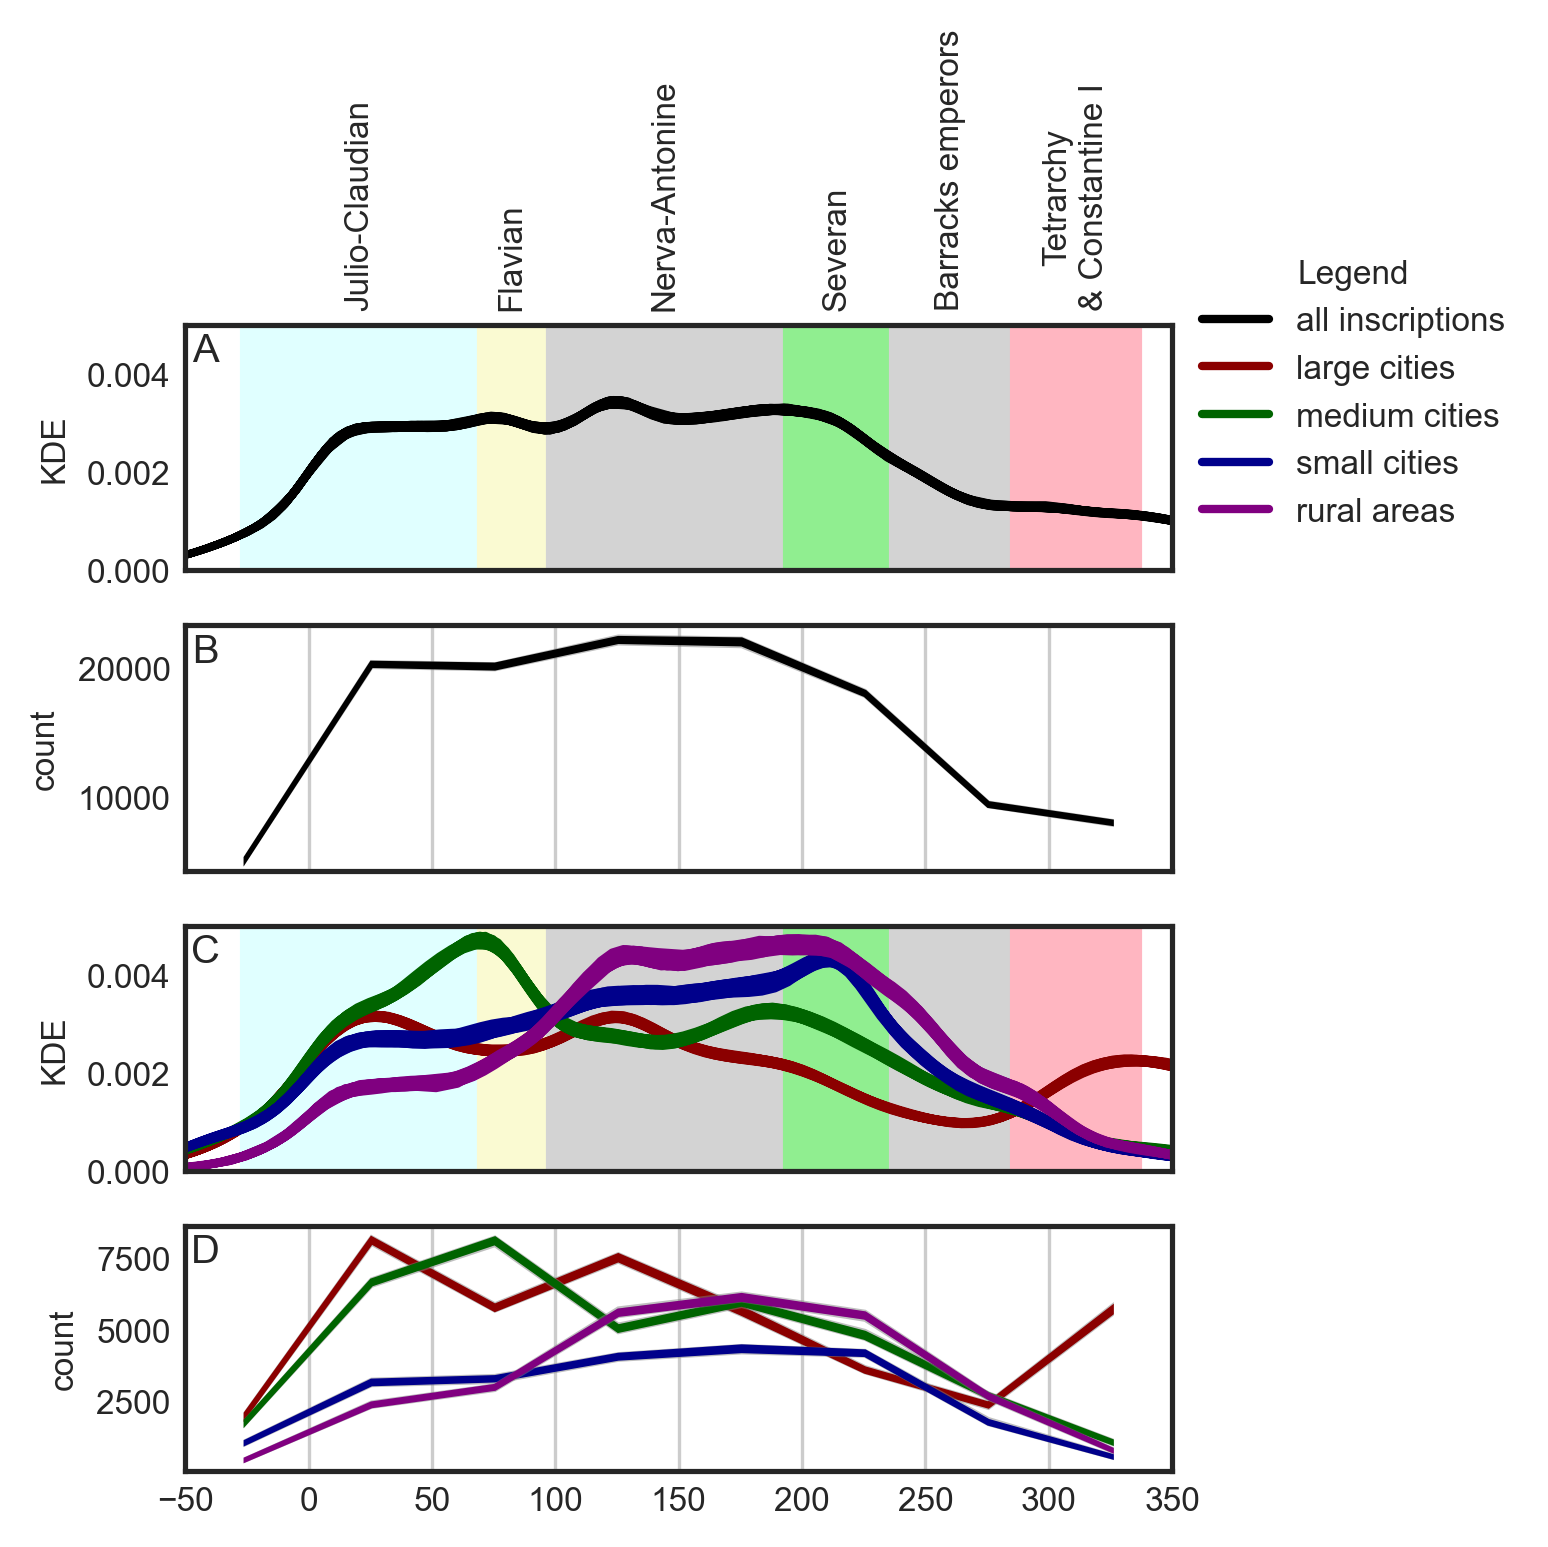

In [109]:
%%time 
n_sim = 1000
labels=[key for key in periods.keys()]
positions = [np.mean(tup) for tup in timeblocks_periods]

fig, [ax1, ax2, ax3, ax4] = plt.subplots(4,1, figsize=[5.2, 5.2], tight_layout=True)

# ax1 - total KDE plot
for data in var_data_lire[:n_sim]:
    sns.kdeplot(data, ax=ax1, color="black")   

for period, color in zip(periods.keys(), colors_list):
    ax1.axvspan(periods[period]["startdate"], periods[period]["enddate"], color=color)#, linestyles="dashed", color="red")
ax1.set_xlim(-50,350)
# period labels
ax1.set_xticks(positions)
ax1.set_xticklabels(labels)
ax1.xaxis.set_tick_params(rotation=90)
ax1.xaxis.tick_top()
ax1.set_ylabel("KDE")
ax1.set_ylim(0,0.005)

# ax2 - timeblocks
tempun.plot_timeblocks_data(LIRE_complete_simulations, color="black", ax=ax2)
ax2.set_ylabel("count")
ax2.set_xlim(-50,350)
ax2.xaxis.grid()
ax2.set_xticklabels([])

# ax3 - KDE plot
for data in var_data_large[:n_sim]:
    sns.kdeplot(data, ax=ax3, color="darkred")
for data in var_data_medium[:n_sim]:
    sns.kdeplot(data, ax=ax3, color="darkgreen")
for data in var_data_small[:n_sim]:
    sns.kdeplot(data, ax=ax3, color="darkblue")
for data in var_data_rural[:n_sim]:
    sns.kdeplot(data, ax=ax3, color="purple")

for period, color in zip(periods.keys(), colors_list):
    ax3.axvspan(periods[period]["startdate"], periods[period]["enddate"], color=color)#, linestyles="dashed", color="red")
ax3.set_xlim(-50,350)
ax3.set_ylabel("KDE")
#ax3.set_xticks([])
ax3.set_xticklabels([])
ax3.set_ylim(0,0.005)


# ax4 - timeblocks
tempun.plot_timeblocks_data(sim_large, color="darkred", ax=ax4)
tempun.plot_timeblocks_data(sim_medium, color="darkgreen", ax=ax4)
tempun.plot_timeblocks_data(sim_small, color="darkblue", ax=ax4)
tempun.plot_timeblocks_data(sim_rural, color="purple", ax=ax4)
ax4.set_ylabel("count")
ax4.set_xlim(-50,350)
ax4.xaxis.grid()


# subplot titles
ax1.set_title("A", x=0.02, y=0.75)
ax2.set_title("B", x=0.02, y=0.75)
ax3.set_title("C", x=0.02, y=0.75)
ax4.set_title("D", x=0.02, y=0.75)

legend_labels=[
    "all inscriptions",
    "large cities",
    "medium cities",
    "small cities",
    "rural areas"]

colors=["black", "darkred", "darkgreen", "darkblue", "purple"]
markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors]
ax1.legend(markers, legend_labels, numpoints=1,  title="Legend", bbox_to_anchor=(1, 0.05), loc='lower left')

In [110]:
save_figure(fig, "lire_tempdist_kde_timeblocks")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_tempdist_kde_timeblocks.eps"
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_tempdist_kde_timeblocks.png"


# Christian inscriptions?

In [114]:
def eval_inscr_type(el):
    if not isinstance(el, float): # i.e. if not nan
        try: el = eval(el)
        except: pass
        if isinstance(el, list):
            return el
        elif isinstance(el, str):
            return [el]
        else:
            return []
    else:
        return []

In [113]:
LIRE["inscr_type_list"] = LIRE["inscr_type"].apply(eval_inscr_type)

In [115]:
inscr_types_flatlist = [
    el for ellist in LIRE["inscr_type_list"].tolist() for el in ellist]

In [116]:
set(inscr_types_flatlist)

{'carmina',
 'defixiones',
 'diplomata militaria',
 'inscriptiones christianae',
 'leges',
 'miliaria',
 'reges',
 'senatus consulta',
 'signacula',
 'termini',
 'tituli fabricationis',
 'tituli honorarii',
 'tituli operum',
 'tituli possessionis',
 'tituli sacri',
 'tituli sepulcrales'}

In [117]:
LIRE["christian"] = LIRE["inscr_type_list"].apply(lambda x: "inscriptiones christianae" in x)

In [118]:
N_christ = len(LIRE[LIRE["christian"]])
N_christ

15730

In [119]:
N_christ_rome = len(LIRE[(LIRE["christian"]) & (LIRE["within_rome"])])
N_christ_rome

13543

In [167]:
# christian inscriptions from rome
(N_christ_rome / N_christ) * 100

86.03099987295134

In [122]:
LIRE_large = LIRE[LIRE["urban_context_alt"]=="large"]
len(LIRE_large)

48799

In [ ]:
LIRE_large[LIRE_large["city"]

In [123]:
len(LIRE_large[LIRE_large["within_rome"]])

42492

In [124]:
len(LIRE_large[LIRE_large["christian"]]["inscr_type_list"].apply(lambda x: "tituli sepulcrales" in x))

13707

In [125]:
len(LIRE_large[(LIRE_large["christian"]) & (LIRE_large["within_rome"])]["inscr_type_list"].apply(lambda x: "tituli sepulcrales" in x))

13543

In [126]:
sim_big_chr = tempun.timeblocks_from_randoms(LIRE_large[LIRE_large["christian"]==True], "random_dates", [-50, 350, 50])
sim_big_nonchr = tempun.timeblocks_from_randoms(LIRE_large[LIRE_large["christian"]==False], "random_dates", [-50, 350, 50])

In [135]:
%%time
n_sim
var_data_chr, var_data_nonchr = [], []
for var_n in range(1000):
    var_data_chr.append([var[var_n] for var in LIRE_large[LIRE_large["christian"]==True]["random_dates"] if var !=None])
    var_data_nonchr.append([var[var_n] for var in LIRE_large[LIRE_large["christian"]==False]["random_dates"] if var !=None])

CPU times: user 1min 15s, sys: 11 s, total: 1min 26s
Wall time: 1min 31s


CPU times: user 6min 54s, sys: 6min 16s, total: 13min 11s
Wall time: 1min 51s


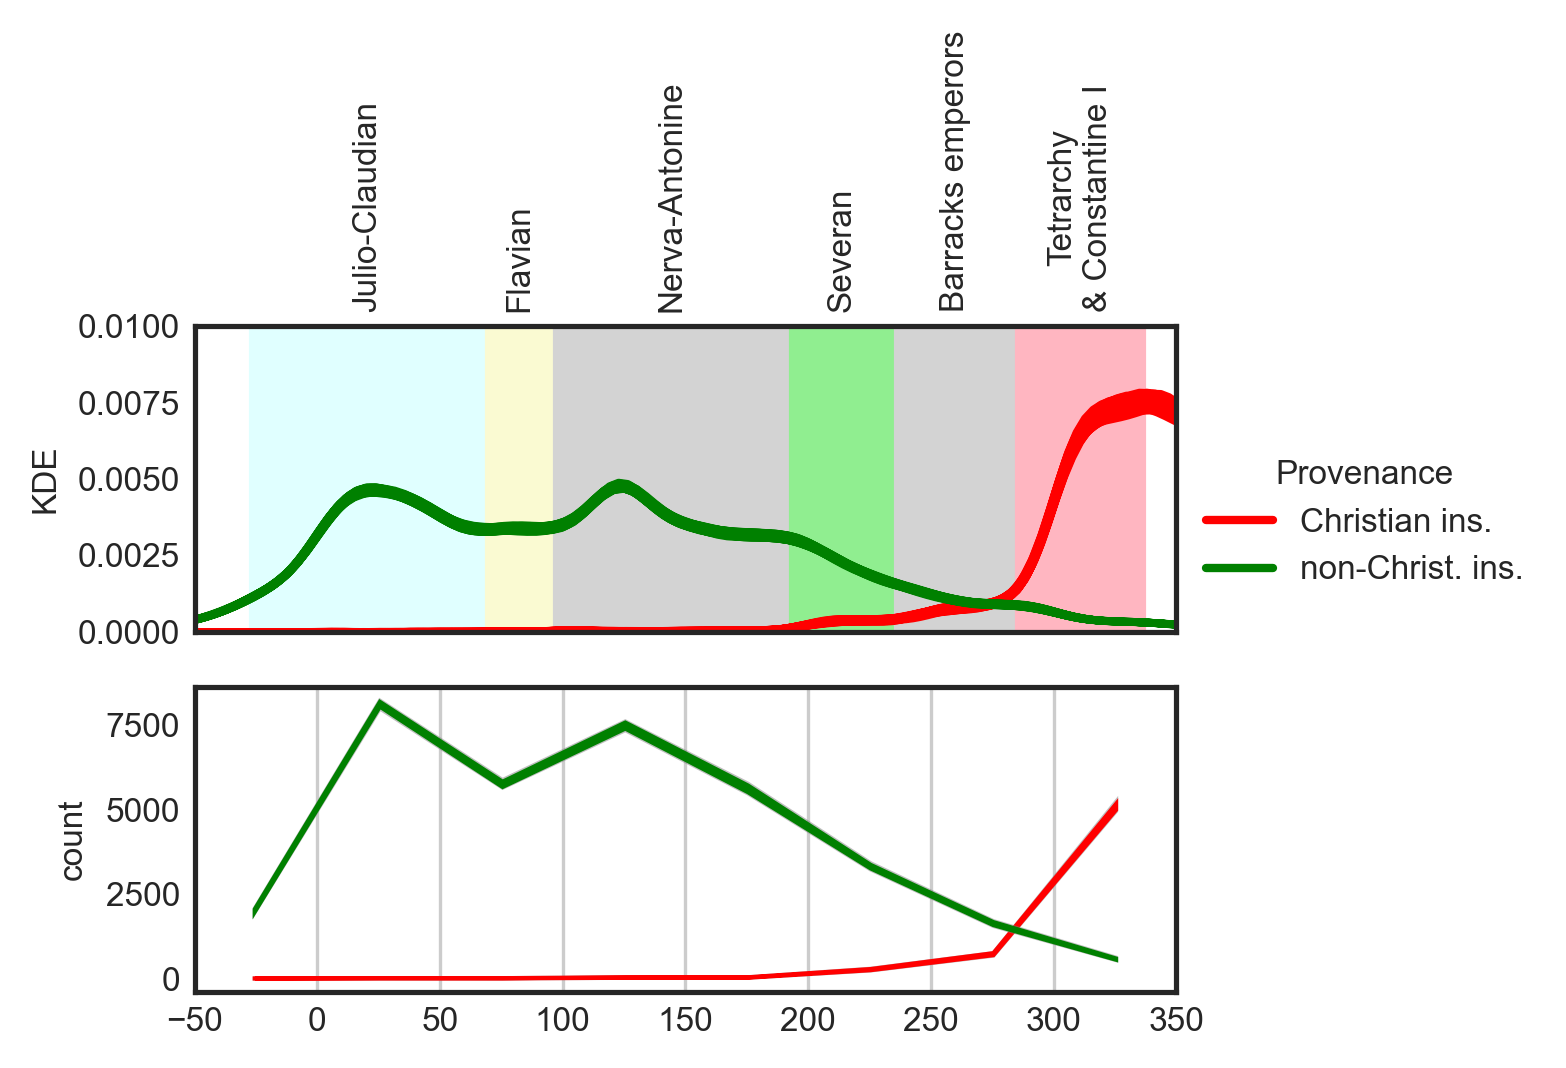

In [136]:
%%time

n_sim = 1000

fig, [ax1, ax2] = plt.subplots(2,1, figsize=(5.2, 3.6), tight_layout=True)

for period, color in zip(periods.keys(), colors_list):
    ax1.axvspan(periods[period]["startdate"], periods[period]["enddate"], color=color)#, linestyles="dashed", color="red")

for data in var_data_chr[:n_sim]:
    sns.kdeplot(data, ax=ax1, color="red")
for data in var_data_nonchr[:n_sim]:
    sns.kdeplot(data, ax=ax1, color="green") 
ax1.set_xlim(-50,350)
# period labels
ax1.set_xticks(positions)
ax1.set_xticklabels(labels)
ax1.xaxis.set_tick_params(rotation=90)
ax1.xaxis.tick_top()
ax1.set_ylabel("KDE")
ax1.set_ylim(0,0.01)
    
# ax1
tempun.plot_timeblocks_data(sim_big_chr, color="red", ax=ax2)
tempun.plot_timeblocks_data(sim_big_nonchr, color="green", ax=ax2)

ax2.set_ylabel("count")
ax2.set_xlim(-50,350)
ax2.xaxis.grid()
#ax4.set_title("D", x=0.02, y=0.65)

legend_labels=[
    "Christian ins.",
    "non-Christ. ins."]

colors=["red", "green"]
markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors]
ax1.legend(markers, legend_labels, numpoints=1,  title="Provenance", bbox_to_anchor=(1, 0.05), loc='lower left')

In [138]:
save_figure(fig, "lire_large_tempdist_christ.png")

A file with the same name ("lire_large_tempdist_christ.png.eps") already exists in this location.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_large_tempdist_christ.png.eps"
A file with the same name ("lire_large_tempdist_christ.png.png") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_large_tempdist_christ.png.png"


# Spatial dissemination of inscriptions

In [139]:
def get_date_var(randoms):
    try: return randoms[0]
    except: return None
LIRE["date_var_1"] = LIRE["random_dates"].apply(get_date_var)

In [140]:
def date_to_str(date):
    if date < 0:
        date = str(abs(date)) + "BC"
    else: 
        date = str(date) + "AD"
    return date

periods_labels = []
for period in periods.keys():
    start = date_to_str(periods[period]["startdate"])
    end = date_to_str(periods[period]["enddate"])
    periods_labels.append(period + " ({0}-{1})".format(start, end))
periods_labels

['Julio-Claudian (27BC-68AD)',
 'Flavian (69AD-96AD)',
 'Nerva-Antonine (97AD-192AD)',
 'Severan (193AD-235AD)',
 'Barracks emperors (236AD-284AD)',
 'Tetrarchy\n& Constantine I (285AD-337AD)']

In [141]:
### # pelagios provinces - only for plotting purposes
pleiades_regions = gpd.read_file('../data/pleiades_regions.geojson', driver='GeoJSON')

In [142]:
lire_df_by_periods = []

for period in timeblocks_periods:
    lire_sample = LIRE[LIRE["date_var_1"].between(period[0], period[1])]
    lire_df_by_periods.append(lire_sample)

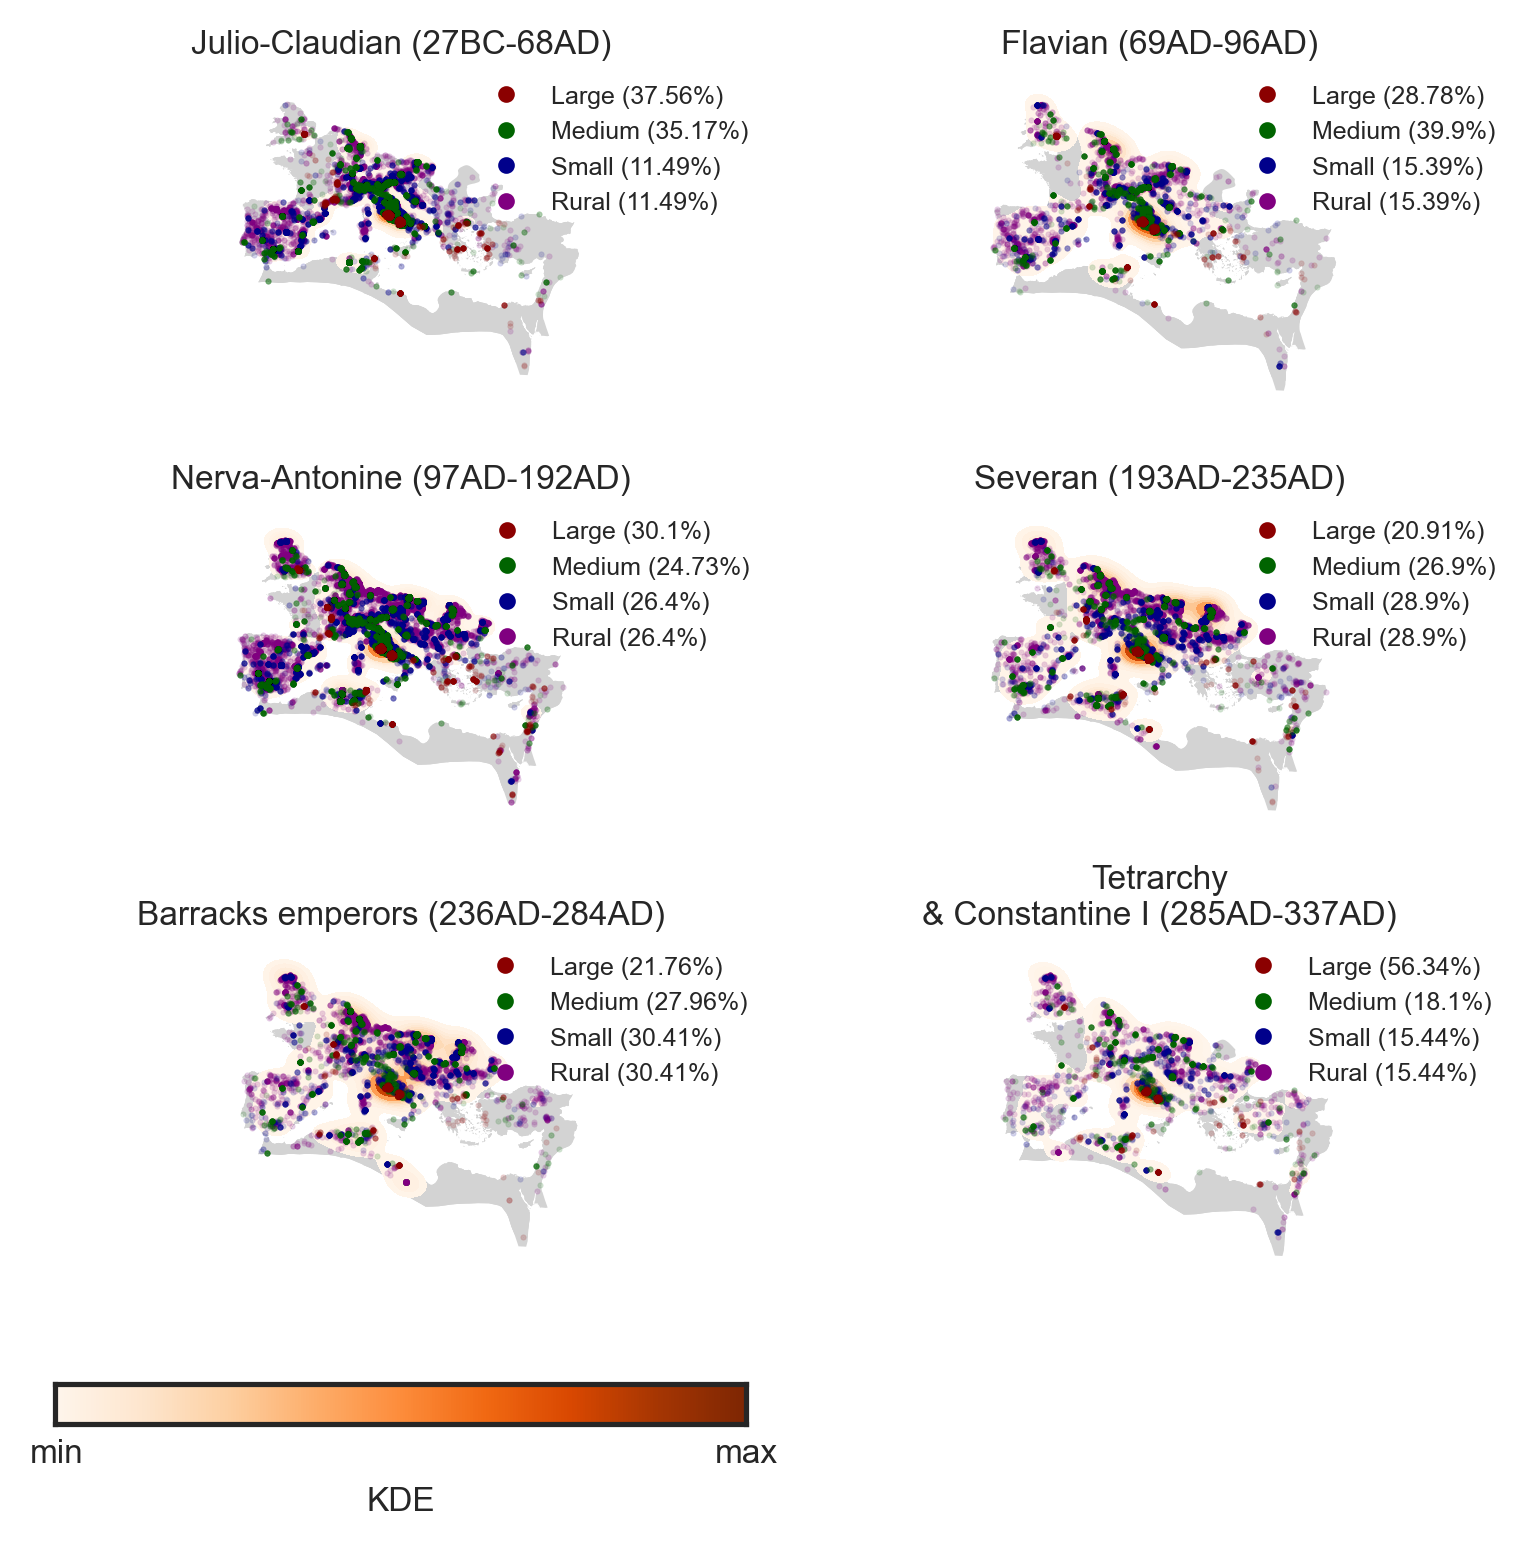

In [146]:
fig, axs  = plt.subplots(4, 2, figsize=(5.2, 5.2), tight_layout=True, gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [8, 8, 8, 1]})
contexts_pct = {}
for df, ax, period in zip(lire_df_by_periods, axs.ravel(), periods_labels):
    pleiades_regions.plot(ax=ax, color="lightgray", zorder=2)
    gplt.kdeplot(df, cmap='Oranges', ax=ax, shade=True, zorder=2)
    for context, color in [("rural", "purple"), ("small", "darkblue"), ("medium", "darkgreen"), ("large", "darkred")]:
        df_context = df[df["urban_context_alt"]==context]
        contexts_pct[context] = str(np.round(((len(df_context) / len(df)) * 100), 2)) + "%"
        df_context.plot(markersize=0.2, alpha=0.2, color=color, ax=ax, zorder=3)
    ax.set_title(period, fontsize=8)
    ax.set_axis_off()
    markers = [plt.Line2D([0,0],[0,0],color=color, marker=".", linestyle="") for color in ["darkred", "darkgreen", "darkblue", "purple"]]
    
    legend_labels = ["Large ({0})".format(contexts_pct["large"]), "Medium ({0})".format(contexts_pct["medium"]), "Small ({0})".format(contexts_pct["rural"]), "Rural ({0})".format(contexts_pct["rural"])]
    ax.legend(markers, legend_labels, numpoints=1, bbox_to_anchor=(0.65, 1.05), loc='upper left', fontsize=6)
    ax.set_rasterization_zorder(3)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))    
axs[3,0].imshow(gradient, aspect='auto', cmap=plt.get_cmap("Oranges"))
axs[3,0].set_yticklabels([])
axs[3,0].set_xticks([0, 256])
axs[3,0].set_xticklabels(["min", "max"])
axs[3,0].set_xlabel("KDE")

axs[3,1].set_axis_off()

plt.subplots_adjust(wspace=0, hspace=0)

In [147]:
save_figure(fig, "spatial_distribution_tempo")

A file with the same name ("spatial_distribution_tempo.eps") already exists in this location.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/spatial_distribution_tempo.eps"
A file with the same name ("spatial_distribution_tempo.png") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/spatial_distribution_tempo.png"


# Inscriptions over time: Word counts & character counts

In [148]:
# functions to be used to extract interesting information from timeblocks simulation data

def wordcount(timeblock_df, column="clean_text_interpretive_word"):
    """number of words in inscriptions within timeblock"""
    return timeblock_df[column].astype(str).apply(lambda x: len(x.split())).sum()

def wordcount_avg(timeblock_df, column="clean_text_interpretive_word"):
    """average number of words in inscriptions within timeblock"""
    return timeblock_df[column].astype(str).apply(lambda x: len(x.split())).sum() / len(timeblock_df)

def charcount(timeblock_df, column="clean_text_interpretive_word"):
    """number of characters in inscriptions within timeblock"""
    return timeblock_df[column].astype(str).apply(lambda x: len(x)).sum()

def charcount_avg(timeblock_df, column="clean_text_interpretive_word"):
    """average number of characters in inscriptions within timeblock"""
    return timeblock_df[column].astype(str).apply(lambda x: len(x)).sum() / len(timeblock_df)

def unique_words(timeblock_df, column="clean_text_interpretive_word"):
    """number of unique words in inscriptions within timeblock"""
    inscriptions_list = timeblock_df[column].astype(str).tolist()
    unique_words = len(set(" ".join(inscriptions_list).split()))
    return unique_words

def unique_words_weighted(timeblock_df, column="clean_text_interpretive_word"):
    """number of unique words in inscriptions within timeblock
    in proportion to total number of words"""
    wordcount = timeblock_df[column].astype(str).apply(lambda x: len(x.split())).sum()
    inscriptions_list = timeblock_df[column].astype(str).tolist()
    unique_words = len(set(" ".join(inscriptions_list).split()))
    return unique_words / wordcount

def extract_ngrams(text, width=4):
    """extracts character ngrams from a string of given width
    returns: list of ngrams"""
    char_ngrams = ["".join(ngram) for ngram in list(ngrams(str(text), width))]
    return char_ngrams

def unique_ngrams(timeblock_df, column="clean_text_interpretive_word"):
    """number of unique ngrams in inscriptions within timeblock"""
    ngrams_series = timeblock_df[column].astype(str).apply(extract_ngrams)
    all_ngrams = [el for sublist in ngrams_series for el in sublist]
    all_ngrams_unique = list(set(all_ngrams))
    charcount = timeblock_df[column].astype(str).apply(lambda x: len(x)).sum()
    return len(all_ngrams_unique)

def unique_ngrams_weighted(timeblock_df, column="clean_text_interpretive_word"):
    """number of unique ngrams in inscriptions within timeblock
    in proportion to total number of characters"""
    ngrams_series = timeblock_df[column].astype(str).apply(extract_ngrams)
    all_ngrams = [el for sublist in ngrams_series for el in sublist]
    all_ngrams_unique = list(set(all_ngrams))
    charcount = timeblock_df[column].astype(str).apply(lambda x: len(x)).sum()
    return len(all_ngrams_unique) / charcount

In [185]:
%%time
wordcounts_data = tempun.sim_data_by_function(LIRE, 100, [-50, 350, 50], wordcount)
wordcounts_avg_data = tempun.sim_data_by_function(LIRE, 100, [-50, 350, 50], wordcount_avg)
charcounts_data = tempun.sim_data_by_function(LIRE, 100, [-50, 350, 50], charcount)
charcounts_avg_data = tempun.sim_data_by_function(LIRE, 100, [-50, 350, 50], charcount_avg)
unique_words_data = tempun.sim_data_by_function(LIRE, 100, [-50, 350, 50], unique_words)
unique_ngrams_data = tempun.sim_data_by_function(LIRE, 100, [-50, 350, 50], unique_ngrams)

CPU times: user 20min 1s, sys: 1.35 s, total: 20min 2s
Wall time: 20min 2s


In [186]:
sim_data_list = [
    (LIRE_complete_simulations, "(A) inscription counts", "count"),
    (wordcounts_data, "(B) word counts", "count"),
    (charcounts_data,  "(C) character counts", "character count"),
    (unique_words_data, "(D) unique words", "count"),
    (unique_ngrams_data, "(E) unique character four-grams", "count"),
    (charcounts_avg_data, "(F) avg. char. counts per ins.", "avr. char. count")]

In [165]:
colors_base_list = list(mcolors.BASE_COLORS)

In [166]:
colors_base_list

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

[0.0, 5000.0, 10000.0, 15000.0, 20000.0, 25000.0]
[0.0, 100000.0, 200000.0, 300000.0, 400000.0]
[0.0, 500000.0, 1000000.0, 1500000.0, 2000000.0, 2500000.0]
[10000.0, 20000.0, 30000.0, 40000.0]
[20000.0, 30000.0, 40000.0, 50000.0, 60000.0]


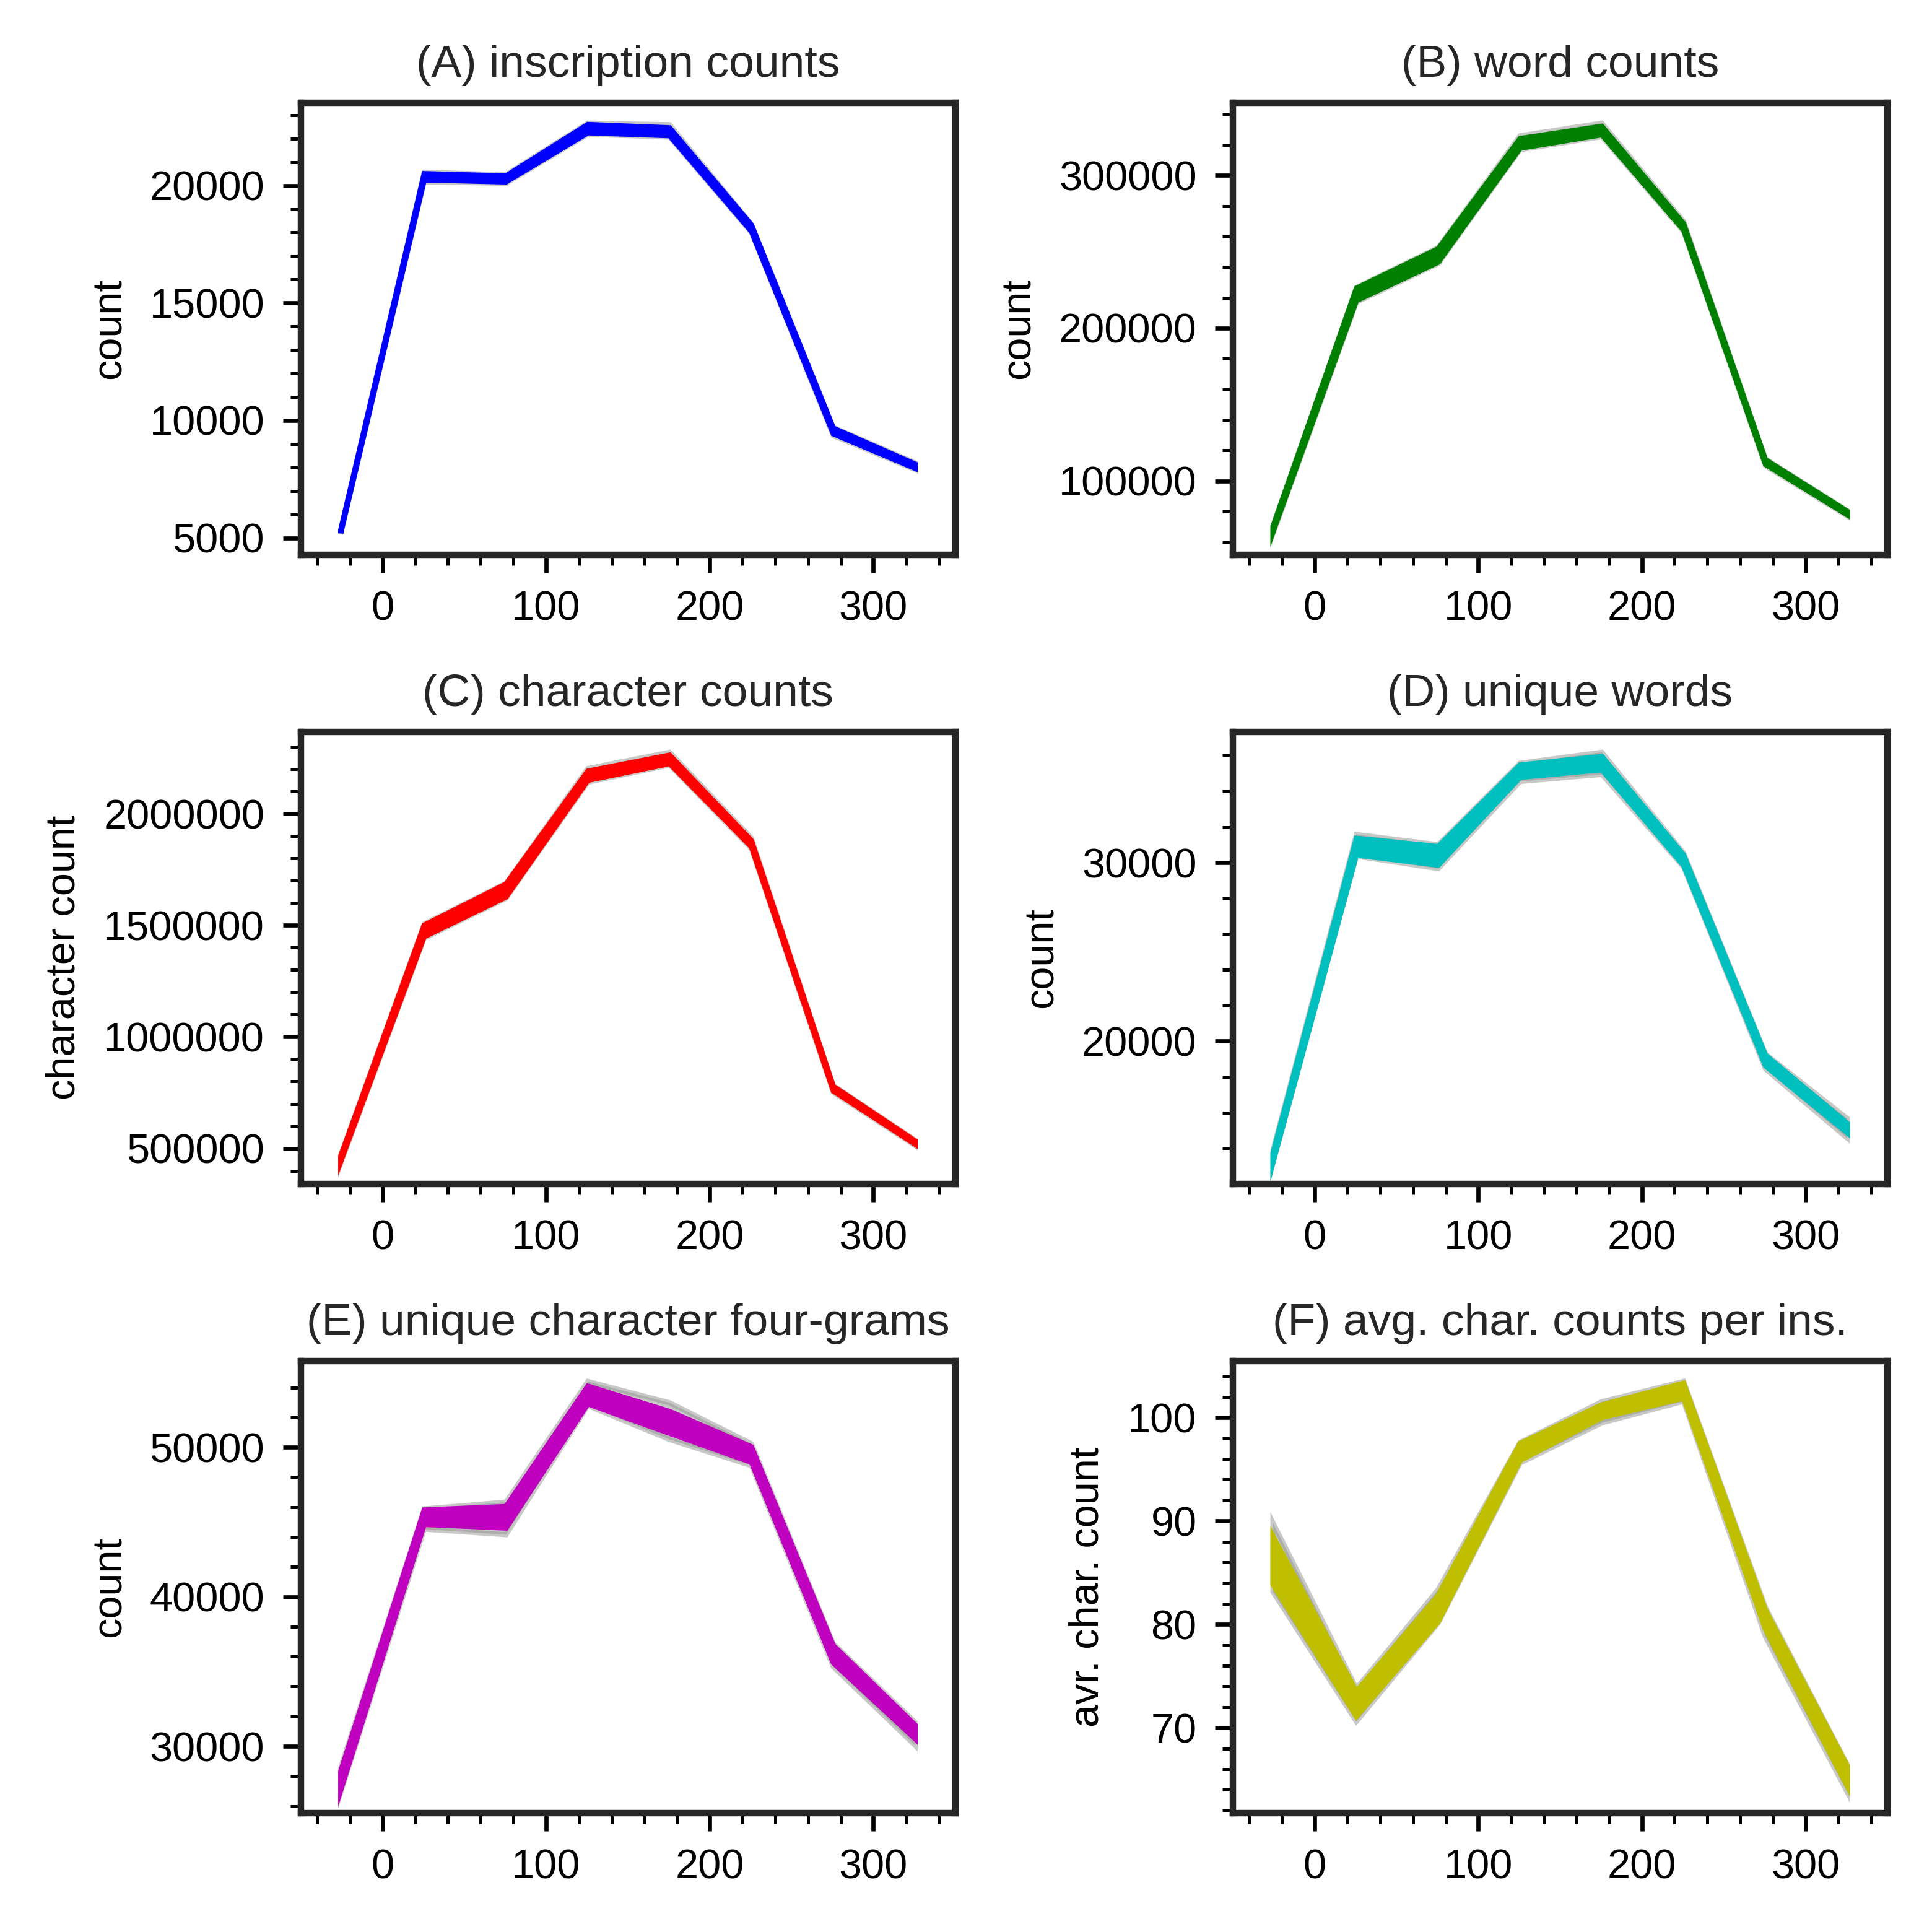

In [265]:
mpl.rcParams["axes.formatter.limits"] = [-5, 10]

fig, axs  = plt.subplots(3, 2, figsize=(5.2, 5.2), tight_layout=True)

for sim_data, ax, color in zip(sim_data_list, axs.ravel(), colors_base_list[:len(sim_data_list)]):
    tempun.plot_timeblocks_data(sim_data[0], ax, color)
    ax.set_xlim([-50, 350])
    ax.set_title(sim_data[1])
    ax.set_ylabel(sim_data[2])
    if max([el[1] for el in sim_data[0][0]]) > 5000:
        ticks = list(ax.get_yticks())
        print(ticks)
        ticks_K = [str(int(int(tick) / 1000)) + "K" if tick != 0 else tick for tick in ticks]
        #ax.set_yticklabels(ticks_K)
# to hide an axis:
#axs[3,1].set_axis_off()

# Inscriptions over time: Types of inscriptions

In [149]:
simulations_by_type_len = []

for ins_type in LIRE["type_of_inscription_auto"].unique():
    if ins_type != "NULL":
        subset_df = LIRE[LIRE["type_of_inscription_auto"]==ins_type]
        simulations_by_type_len.append((ins_type, len(subset_df)))
simulations_by_type_len = sorted(simulations_by_type_len, key = lambda x: x[1], reverse=True)
simulations_by_type_len

[('epitaph', 74578),
 ('votive inscription', 15700),
 ('owner/artist inscription', 10460),
 ('honorific inscription', 5573),
 ('building/dedicatory inscription', 3241),
 ('mile-/leaguestone', 2536),
 ('identification inscription', 1910),
 ('acclamation', 443),
 ('boundary inscription', 410),
 ('military diploma', 329),
 ('list', 294),
 ('defixio', 292),
 ('letter', 288),
 ('label', 273),
 ('elogium', 150),
 ('public legal inscription', 132),
 ('seat inscription', 54),
 ('private legal inscription', 37),
 ('prayer', 23),
 ('assignation inscription', 16),
 ('calendar', 13),
 ('adnuntiatio', 1),
 (None, 0)]

In [150]:
simulations_by_type = []

for ins_type_tup in simulations_by_type_len[:10]:
    subset_df = LIRE[LIRE["type_of_inscription_auto"]==ins_type_tup[0]]
    simulations = tempun.timeblocks_from_randoms(subset_df, "random_dates", [-200, 600, 100])
    ins_type_N =len(subset_df)
    simulations_by_type.append([ins_type_tup[0],ins_type_N, simulations]) 
simulations_by_type = sorted(simulations_by_type, key=lambda x: x[1], reverse=True)

In [151]:
date_vars_by_instypes = []
for ins_type_tup in simulations_by_type_len[:10]:
    subset_df = LIRE[LIRE["type_of_inscription_auto"]==ins_type_tup[0]]
    date_vars = []
    for n in range(100):
        date_vars.append([date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

In [161]:
tab_colors = list(mcolors.TABLEAU_COLORS.keys())#
tab_colors

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

CPU times: user 1min 37s, sys: 1min 5s, total: 2min 43s
Wall time: 28.5 s


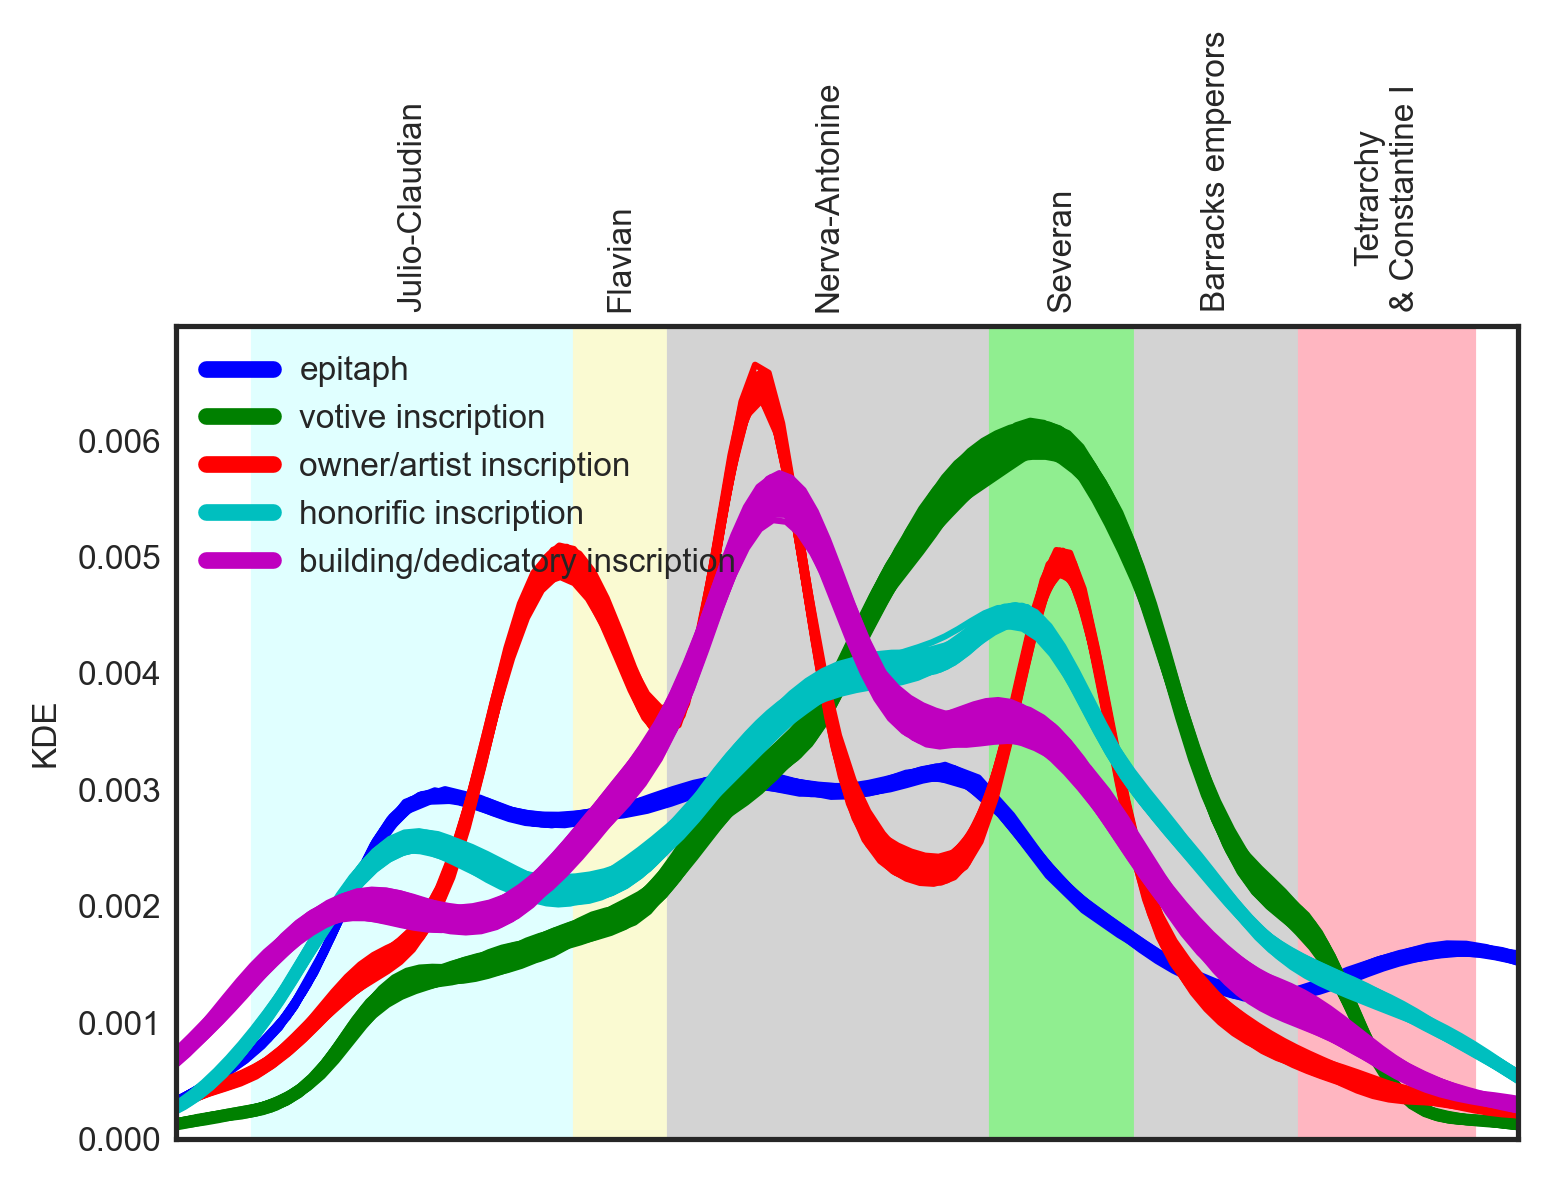

In [174]:
%%time

n_sim = 1000
# timeconsuming, because of the KDE involved
labels=[key for key in periods.keys()]
positions = [np.mean(tup) for tup in timeblocks_periods]

fig, ax = plt.subplots(figsize=[5.2,4], tight_layout=True)

labels_ins = [tup[0] for tup in simulations_by_type_len]

#for period, color in zip(periods.keys(), colors_list):
#    ax.axvspan(periods[period]["startdate"], periods[period]["enddate"], color=color, alpha=0.2)#, linestyles="dashed", color="red")

for period, color in zip(periods.keys(), colors_list):
    ax.axvspan(periods[period]["startdate"], periods[period]["enddate"], color=color)#, linestyles="dashed", color="red")

for instype_data, color in zip(date_vars_by_instypes[:5], colors_base_list[:5]):
    for sim_var in instype_data[:n_sim]:
        sns.kdeplot(sim_var, ax=ax, color=color)
        
ax.set_xlim(-50,350)
ax.set_ylabel("KDE")

# period labels
ax.xaxis.tick_top()
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(rotation=90)


# time ticks
#ax.secondary_xaxis("bottom", functions=())

markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in colors_base_list[:len(simulations_by_type)]]
plt.legend(markers, labels_ins[:5], bbox_to_anchor=(0, 1), loc='upper left')

In [175]:
save_figure(fig, "lire_tempdist_inscrtypes_kde")

A file with the same name ("lire_tempdist_inscrtypes_kde.eps") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_tempdist_inscrtypes_kde.eps"
A file with the same name ("lire_tempdist_inscrtypes_kde.png") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_tempdist_inscrtypes_kde.png"


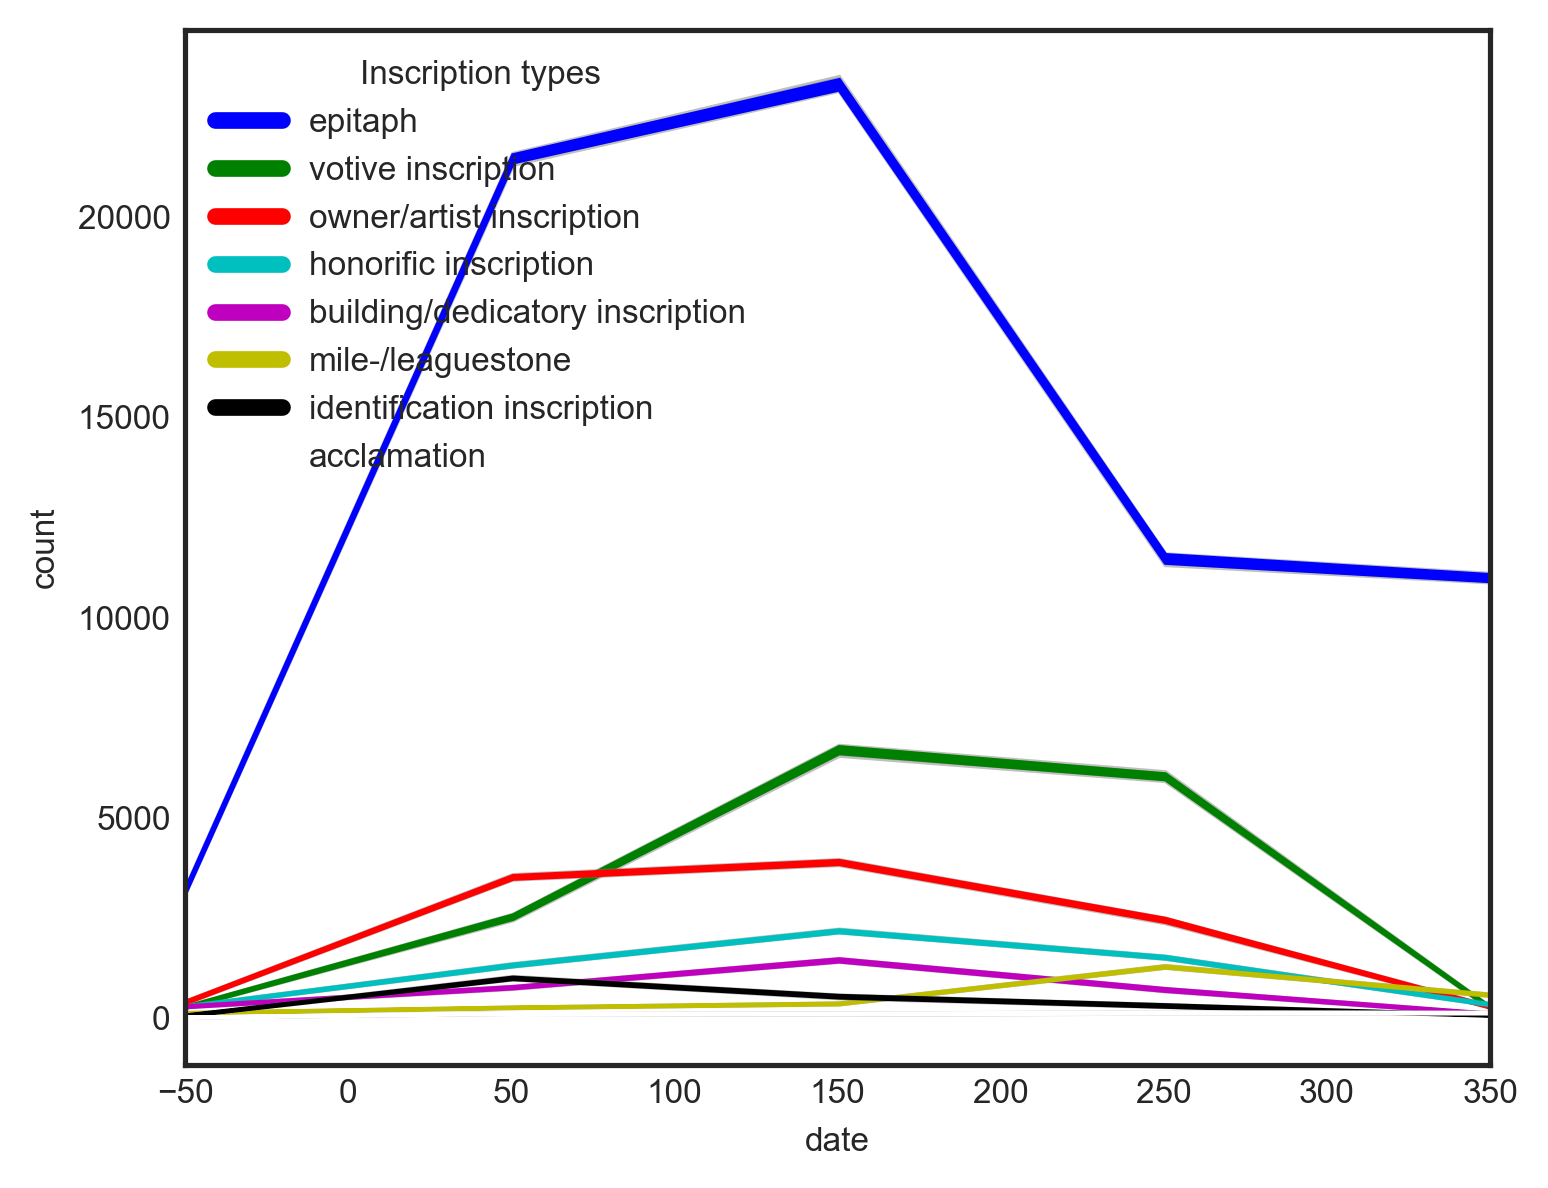

In [177]:
fig, ax  = plt.subplots(figsize=(5.2, 4), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type, colors_base_list[:len(simulations_by_type)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)
    
ax.set_xlabel("date")
ax.set_ylabel("count")
ax.set_xlim(-50,350)
#ax.set_title("EDH - 10 most common inscription types over time")
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in colors_base_list[:len(simulations_by_type)]]
plt.legend(markers, [tup[0] for tup in simulations_by_type], numpoints=1,  title="Inscription types", bbox_to_anchor=(0, 1), loc='upper left')

In [178]:
save_figure(fig, "lire_tempdist_inscrtypes_timeblocks")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_tempdist_inscrtypes_timeblocks.eps"
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/lire_tempdist_inscrtypes_timeblocks.png"
